In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

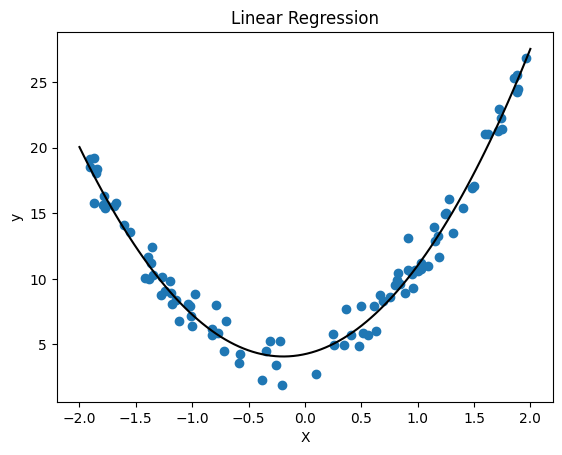

In [24]:
X = 4 * np.random.rand(100,1) - 2
y = 4 + 2*X + 5*X**2 + np.random.randn(100,1)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

reg = LinearRegression()
reg.fit(X_poly,y)

X_vals = np.linspace(-2, 2, 100).reshape(-1,1)
X_vals_poly = poly_features.transform(X_vals)
y_pred = reg.predict(X_vals_poly)

plt.scatter(X, y)
plt.plot(X_vals, y_pred, color='black')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

In [23]:
print(reg.coef_)
print(reg.intercept_)

[[0.         1.91908478 5.06835576]]
[3.95209994]


From scratch

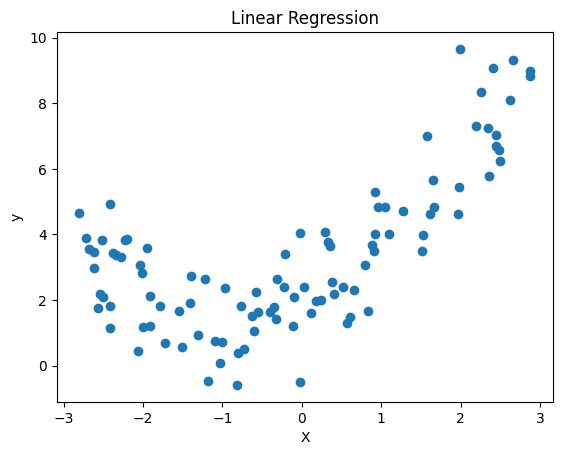

In [35]:
m = 100
X2 = 6 * np.random.rand(m, 1) - 3
y2 = 0.5 * X2**2 + X2 + 2 + np.random.randn(m,1)

plt.scatter(X2, y2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

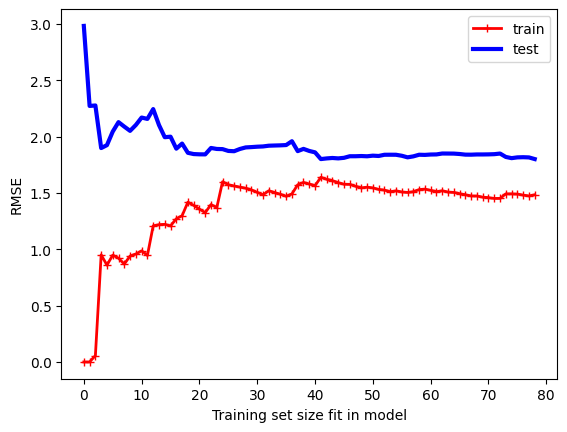

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
  train_errors, test_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(test_errors), 'b-', linewidth=3, label='test')
  plt.legend()
  plt.xlabel('Training set size fit in model')
  plt.ylabel('RMSE')
  plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X2, y2)

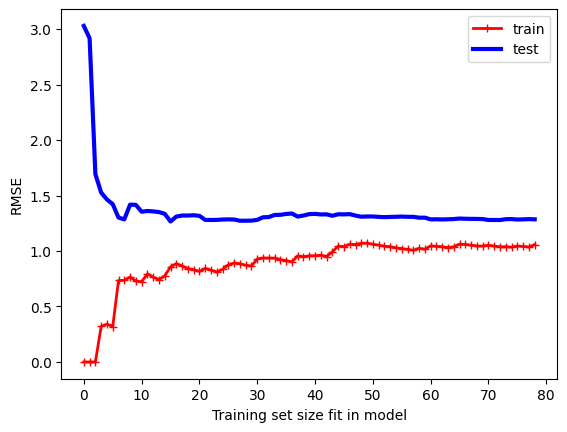

In [36]:
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lin', LinearRegression())
])

plot_learning_curves(poly_reg, X2, y2)